In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file Excel
file_path = "/content/DAKTGM_OK_update_kroscek.xlsx"
data = pd.read_excel(file_path)

# Menampilkan data
print(data.head())


     Propinsi       Kab/Kota  latitude   longitude  collection2023  \
0  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
1  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
2  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
3  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
4  jawa timur  kab. lamongan -7.406153  109.394679            4.09   

   service2023  infrastructure2023  building2023  staff2023  Overall2023  ...  \
0         4.15                4.23          4.16       4.27         4.18  ...   
1         4.15                4.23          4.16       4.27         4.18  ...   
2         4.15                4.23          4.16       4.27         4.18  ...   
3         4.15                4.23          4.16       4.27         4.18  ...   
4         4.15                4.23          4.16       4.27         4.18  ...   

    Tahun    Nilai_Pagu      Nilai_RK    %RK  Nilai_Kontrak  %Kontrak  \
0  2019.0  1.082618

In [3]:
# prompt: show column

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Membaca data dari file Excel
file_path = "/content/DAKTGM_OK_update_kroscek.xlsx"
data = pd.read_excel(file_path)

# Menampilkan nama kolom
data.columns

Index(['Propinsi', 'Kab/Kota', 'latitude', 'longitude', 'collection2023',
       'service2023', 'infrastructure2023', 'building2023', 'staff2023',
       'Overall2023', 'collection2024', 'service2024', 'infrastructure2024',
       'building2024', 'staff2024', 'Overall2024', 'Kab_Kota_Provinsi', 'Menu',
       'Kode_Menu', 'Tahun', 'Nilai_Pagu', 'Nilai_RK', '%RK', 'Nilai_Kontrak',
       '%Kontrak', 'Nilai_Penyaluran', '%Salur_PAGU', '%Salur_KONTRAK',
       'CONCATENATE'],
      dtype='object')

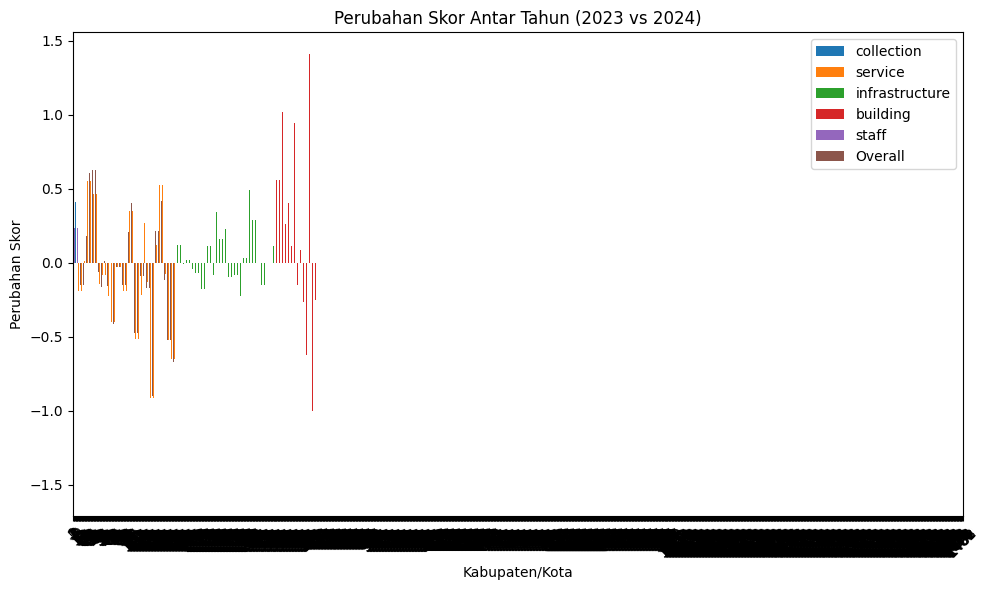

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Menambah kolom selisih antar tahun
for col in ['collection', 'service', 'infrastructure', 'building', 'staff', 'Overall']:
    data[f'diff_{col}'] = data[f'{col}2024'] - data[f'{col}2023']

# Visualisasi perubahan (using the new diff_* columns)
diff_columns = [f'diff_{col}' for col in ['collection', 'service', 'infrastructure', 'building', 'staff', 'Overall']]
data[diff_columns].plot(kind='bar', figsize=(10, 6))

plt.title('Perubahan Skor Antar Tahun (2023 vs 2024)')
plt.xlabel('Kabupaten/Kota')
plt.ylabel('Perubahan Skor')
plt.xticks(rotation=45)
plt.legend([col.replace('diff_', '') for col in diff_columns])  # Clean legend labels
plt.tight_layout()
plt.show()


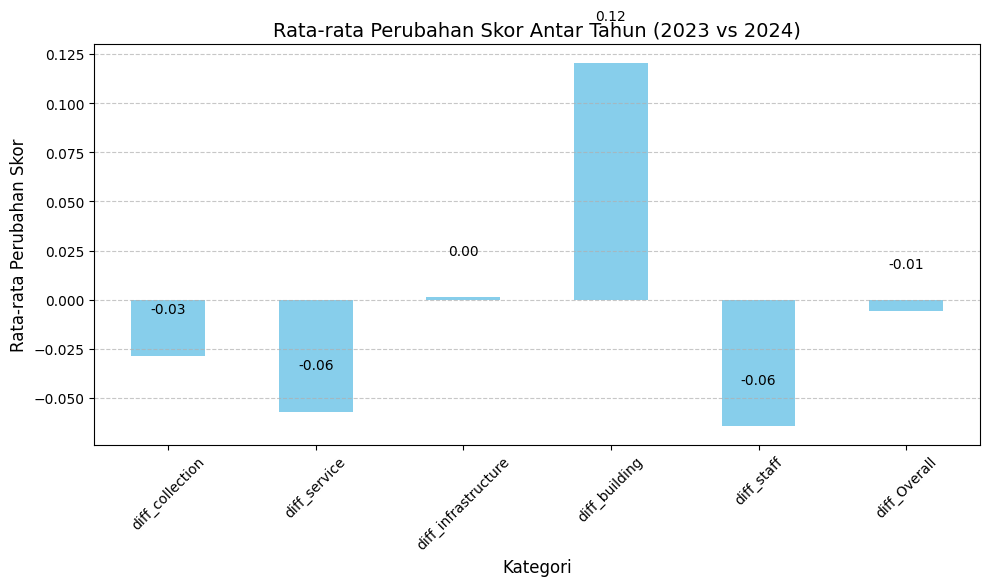

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming `data` is your DataFrame
# Menambah kolom selisih antar tahun
for col in ['collection', 'service', 'infrastructure', 'building', 'staff', 'Overall']:
    data[f'diff_{col}'] = data[f'{col}2024'] - data[f'{col}2023']

# Aggregate by calculating the mean of the differences
agg_diff = data[[f'diff_{col}' for col in ['collection', 'service', 'infrastructure', 'building', 'staff', 'Overall']]].mean()

# Plotting the aggregate differences
fig, ax = plt.subplots(figsize=(10, 6))
bars = agg_diff.plot(kind='bar', ax=ax, color='skyblue')

# Add data labels
for i, v in enumerate(agg_diff):
    ax.text(i, v + 0.02, f"{v:.2f}", ha='center', va='bottom', fontsize=10, color='black')

# Customizing the chart
plt.title('Rata-rata Perubahan Skor Antar Tahun (2023 vs 2024)', fontsize=14)
plt.xlabel('Kategori', fontsize=12)
plt.ylabel('Rata-rata Perubahan Skor', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


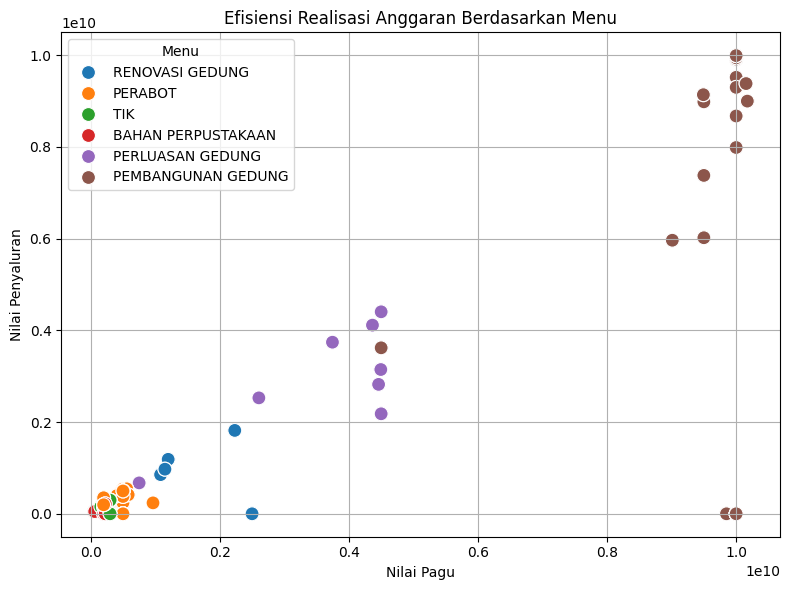

In [6]:
# Menambah kolom efisiensi
data['efficiency_PAGU'] = (data['Nilai_Penyaluran'] / data['Nilai_Pagu']) * 100
data['efficiency_CONTRACT'] = (data['Nilai_Penyaluran'] / data['Nilai_Kontrak']) * 100

# Scatter plot antara PAGU dan realisasi
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Nilai_Pagu', y='Nilai_Penyaluran', data=data, hue='Menu', s=100)
plt.title('Efisiensi Realisasi Anggaran Berdasarkan Menu')
plt.xlabel('Nilai Pagu')
plt.ylabel('Nilai Penyaluran')
plt.legend(title='Menu')
plt.grid(True)
plt.tight_layout()
plt.show()


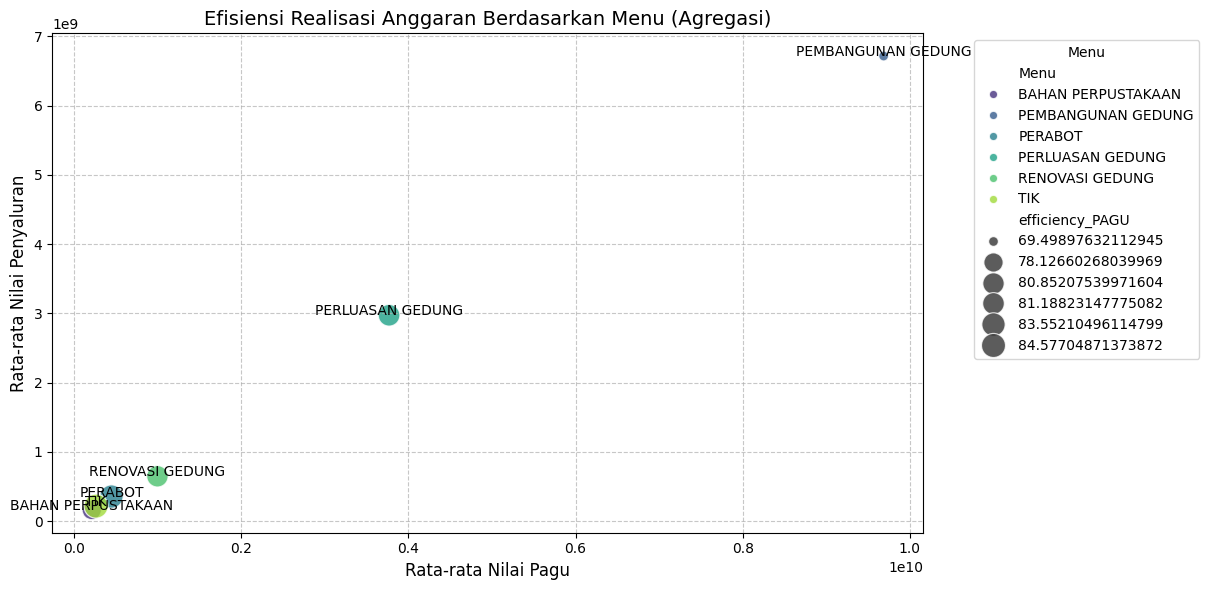

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Menambah kolom efisiensi
data['efficiency_PAGU'] = (data['Nilai_Penyaluran'] / data['Nilai_Pagu']) * 100
data['efficiency_CONTRACT'] = (data['Nilai_Penyaluran'] / data['Nilai_Kontrak']) * 100

# Aggregate data by 'Menu' for mean values
agg_data = data.groupby('Menu').agg({
    'Nilai_Pagu': 'mean',
    'Nilai_Penyaluran': 'mean',
    'efficiency_PAGU': 'mean',
    'efficiency_CONTRACT': 'mean'
}).reset_index()

# Scatter plot of aggregated data
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Nilai_Pagu',
    y='Nilai_Penyaluran',
    size='efficiency_PAGU',
    hue='Menu',
    data=agg_data,
    sizes=(50, 300),  # Adjust size range for better visibility
    palette='viridis',
    alpha=0.8
)

# Adding annotations
for i in range(len(agg_data)):
    plt.text(
        x=agg_data['Nilai_Pagu'][i],
        y=agg_data['Nilai_Penyaluran'][i],
        s=agg_data['Menu'][i],
        fontsize=10,
        ha='center'
    )

# Customizing the plot
plt.title('Efisiensi Realisasi Anggaran Berdasarkan Menu (Agregasi)', fontsize=14)
plt.xlabel('Rata-rata Nilai Pagu', fontsize=12)
plt.ylabel('Rata-rata Nilai Penyaluran', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.legend(title='Menu', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [8]:
import pandas as pd

# Menambah kolom efisiensi
data['efficiency_PAGU'] = (data['Nilai_Penyaluran'] / data['Nilai_Pagu']) * 100
data['efficiency_CONTRACT'] = (data['Nilai_Penyaluran'] / data['Nilai_Kontrak']) * 100

# Aggregate data by 'Menu' for mean values
agg_data = data.groupby('Menu').agg({
    'Nilai_Pagu': 'mean',
    'Nilai_Penyaluran': 'mean',
    'efficiency_PAGU': 'mean',
    'efficiency_CONTRACT': 'mean'
}).reset_index()

# Rename columns for better readability
agg_data.columns = ['Menu', 'Rata-rata Nilai Pagu', 'Rata-rata Nilai Penyaluran',
                    'Efisiensi PAGU (%)', 'Efisiensi Kontrak (%)']

# Display the table
print(agg_data.to_string(index=False))


              Menu  Rata-rata Nilai Pagu  Rata-rata Nilai Penyaluran  Efisiensi PAGU (%)  Efisiensi Kontrak (%)
BAHAN PERPUSTAKAAN          2.104455e+08                1.620691e+08           78.126603              99.874525
PEMBANGUNAN GEDUNG          9.686552e+09                6.715326e+09           69.498976              97.418631
           PERABOT          4.458976e+08                3.564038e+08           83.552105              99.450549
  PERLUASAN GEDUNG          3.768373e+09                2.973303e+09           81.188231              84.670465
   RENOVASI GEDUNG          9.964737e+08                6.487379e+08           80.852075              99.999994
               TIK          2.615688e+08                2.182441e+08           84.577049              97.747191


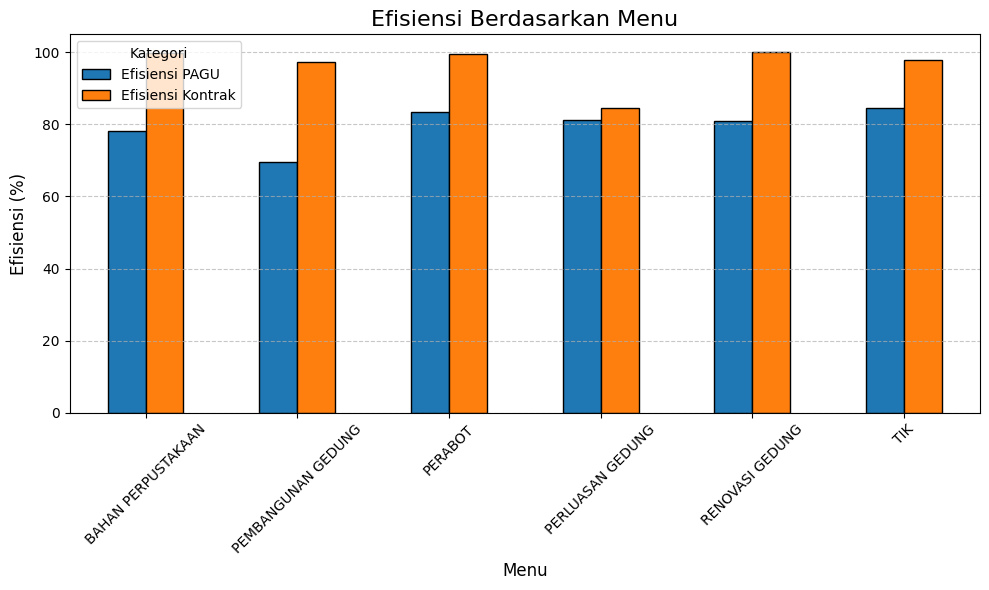

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Menambah kolom efisiensi
data['efficiency_PAGU'] = (data['Nilai_Penyaluran'] / data['Nilai_Pagu']) * 100
data['efficiency_CONTRACT'] = (data['Nilai_Penyaluran'] / data['Nilai_Kontrak']) * 100

# Aggregate data by 'Menu'
agg_data = data.groupby('Menu').agg({
    'Nilai_Pagu': 'mean',
    'Nilai_Penyaluran': 'mean',
    'efficiency_PAGU': 'mean',
    'efficiency_CONTRACT': 'mean'
}).reset_index()

# Bar chart for efficiencies
agg_data.set_index('Menu')[['efficiency_PAGU', 'efficiency_CONTRACT']].plot(
    kind='bar',
    figsize=(10, 6),
    color=['#1f77b4', '#ff7f0e'],
    edgecolor='black'
)

# Customizing the plot
plt.title('Efisiensi Berdasarkan Menu', fontsize=16)
plt.ylabel('Efisiensi (%)', fontsize=12)
plt.xlabel('Menu', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(['Efisiensi PAGU', 'Efisiensi Kontrak'], title='Kategori', fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


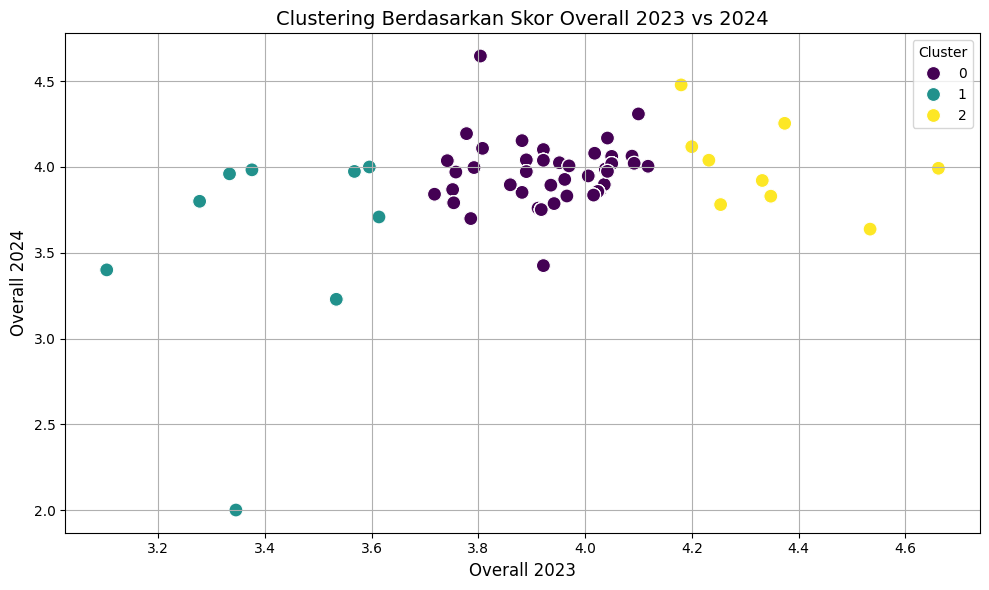

Cluster Counts:
 Cluster
0    1364
1      46
2      74
dtype: int64


In [10]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Features for clustering
features = ['collection2023', 'service2023', 'infrastructure2023',
            'building2023', 'staff2023', 'Overall2023', 'Overall2024']
X = data[features]

# Handle missing values by imputing with the mean
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(X)

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Apply K-Means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(X_scaled)

# Plotting Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='Overall2023',
    y='Overall2024',
    hue='Cluster',
    data=data,
    palette='viridis',
    s=100
)
plt.title('Clustering Berdasarkan Skor Overall 2023 vs 2024', fontsize=14)
plt.xlabel('Overall 2023', fontsize=12)
plt.ylabel('Overall 2024', fontsize=12)
plt.legend(title='Cluster', fontsize=10)
plt.grid(True)
plt.tight_layout()
plt.show()

# Display cluster counts
cluster_counts = data.groupby('Cluster').size()
print("Cluster Counts:\n", cluster_counts)


Analysis:
Cluster Distribution:

The data points are divided into three clusters (0, 1, 2), represented by distinct colors.
Cluster 0 (purple) has the largest concentration of data points, indicating most regions have scores in a mid-range category for both 2023 and 2024.
Cluster 1 (teal) captures regions with relatively lower scores for both years, indicating areas of potential underperformance.
Cluster 2 (yellow) groups regions with the highest scores for both years, showing consistently strong performance.
Trend Analysis (2023 vs. 2024):

There is a general positive correlation between the Overall 2023 and Overall 2024 scores. Higher-performing regions in 2023 tend to maintain or improve their performance in 2024.
A slight spread in Cluster 1 (teal) is noticeable, with some regions improving slightly while others remain stagnant or perform worse.
Cluster Centers:

Each cluster represents a range of performances:
Cluster 0 (purple) represents regions performing steadily around the average score for both years.
Cluster 1 (teal) highlights regions that need attention due to consistently lower scores.
Cluster 2 (yellow) consists of top-performing regions showing strong governance and infrastructure.
Key Differences Between 2023 and 2024:

Some regions have significantly improved their Overall score from 2023 to 2024 (indicated by movement from Clusters 1 or 0 to Cluster 2).
Other regions exhibit stagnation or minor improvements, as evident in Cluster 0, where data points remain tightly packed.
Insights and Recommendations:
Target Low-Performing Regions (Cluster 1):

Regions in Cluster 1 (teal) need focused intervention. Analyze specific variables like "collection," "service," or "infrastructure" to identify critical issues causing low scores.
Develop targeted programs, such as resource allocation or training, to uplift these regions.
Sustain Performance in High-Performing Regions (Cluster 2):

Regions in Cluster 2 (yellow) are leaders and should be used as models of best practices.
Investigate what drives their success (e.g., better infrastructure, larger budgets, efficient staffing) and share insights with other regions.
Cluster 0 (Average Performance):

Most regions fall in this cluster, with consistent yet average scores. These regions may benefit from:
Incremental improvements in specific areas.
Comparing themselves with top-performing regions to identify actionable improvements.
Resource Allocation:

Use the clustering results to guide budget allocation and policy focus. Allocate more resources to underperforming regions (Cluster 1) while continuing to support strong performers (Cluster 2).
Future Clustering:

Extend clustering to include more variables, such as demographic or socioeconomic data, to gain a broader understanding of performance drivers.
Consider analyzing the impact of the "Menu" variable to see if funding focus correlates with cluster performance.

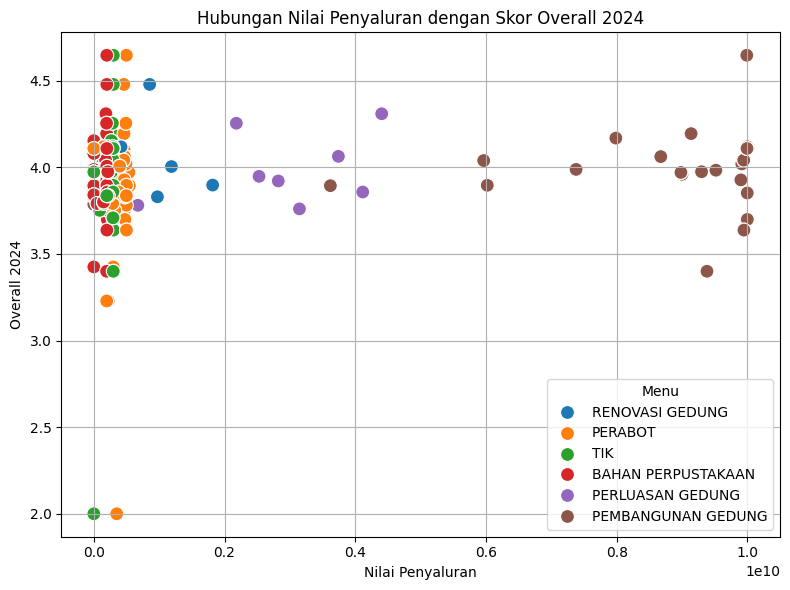

Korelasi: 0.07, P-value: 0.1625


In [11]:
import scipy.stats as stats

# Scatter plot antara realisasi anggaran dan skor Overall
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Nilai_Penyaluran', y='Overall2024', data=data, hue='Menu', s=100)
plt.title('Hubungan Nilai Penyaluran dengan Skor Overall 2024')
plt.xlabel('Nilai Penyaluran')
plt.ylabel('Overall 2024')
plt.grid(True)
plt.legend(title='Menu')
plt.tight_layout()
plt.show()

import numpy as np
import scipy.stats as stats

# Remove rows with NaN or Inf values in the relevant columns
filtered_data = data[np.isfinite(data['Nilai_Penyaluran']) & np.isfinite(data['Overall2024'])]



# Hitung korelasi
correlation, p_value = stats.pearsonr(filtered_data['Nilai_Penyaluran'], filtered_data['Overall2024'])
print(f"Korelasi: {correlation:.2f}, P-value: {p_value:.4f}")


Hasil ANOVA:
              df     sum_sq   mean_sq        F    PR(>F)
Menu        5.0   0.243049  0.048610  0.58078  0.714746
Residual  396.0  33.144137  0.083697      NaN       NaN


<ipython-input-12-0a82b85b1fad>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Menu', y='Overall2024', data=data, palette='Set3')


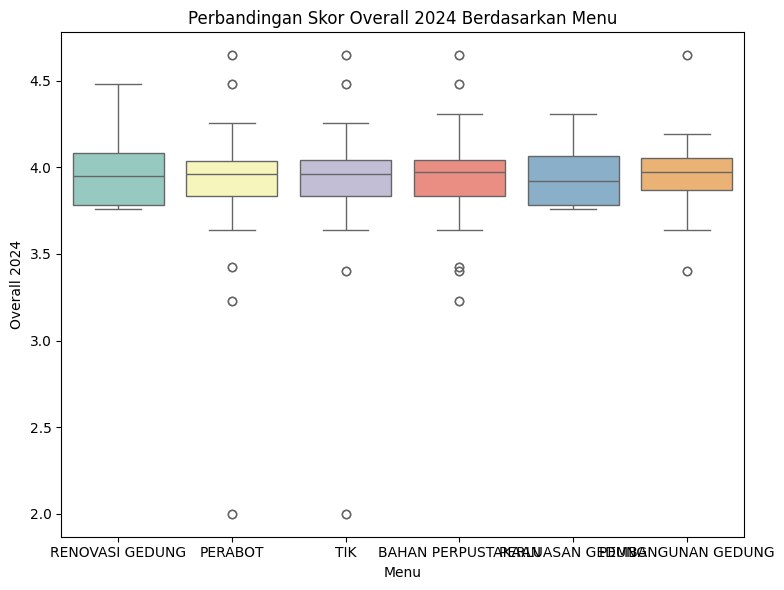

In [12]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

# ANOVA untuk skor Overall2024 berdasarkan Menu
model = ols('Overall2024 ~ Menu', data=data).fit()
anova_results = anova_lm(model)

print("Hasil ANOVA:\n", anova_results)

# Boxplot untuk visualisasi perbedaan
plt.figure(figsize=(8, 6))
sns.boxplot(x='Menu', y='Overall2024', data=data, palette='Set3')
plt.title('Perbandingan Skor Overall 2024 Berdasarkan Menu')
plt.xlabel('Menu')
plt.ylabel('Overall 2024')
plt.tight_layout()
plt.show()


In [13]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

# Handle missing values for latitude, longitude, and Overall2024
data['latitude'] = data['latitude'].fillna(data['latitude'].mean())
data['longitude'] = data['longitude'].fillna(data['longitude'].mean())
data['Overall2024'] = data['Overall2024'].fillna(data['Overall2024'].mean())

# Generate polynomial features for geographic coordinates
poly = PolynomialFeatures(degree=2, include_bias=False)
geo_features = poly.fit_transform(data[['latitude', 'longitude']])

# Fit linear regression model
geo_model = LinearRegression()
geo_model.fit(geo_features, data['Overall2024'])

# Evaluate the model
r_squared = geo_model.score(geo_features, data['Overall2024'])
print(f"R-squared: {r_squared:.2f}")


R-squared: 0.42


     Propinsi       Kab/Kota  latitude   longitude  collection2023  \
0  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
1  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
2  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
3  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
4  jawa timur  kab. lamongan -7.406153  109.394679            4.09   

   service2023  infrastructure2023  building2023  staff2023  Overall2023  ...  \
0         4.15                4.23          4.16       4.27         4.18  ...   
1         4.15                4.23          4.16       4.27         4.18  ...   
2         4.15                4.23          4.16       4.27         4.18  ...   
3         4.15                4.23          4.16       4.27         4.18  ...   
4         4.15                4.23          4.16       4.27         4.18  ...   

   Kode_Menu  Tahun    Nilai_Pagu      Nilai_RK    %RK  Nilai_Kontrak  \
0        3.0   2019

<ipython-input-1-e19cf7bf3182>:37: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['kmeans_cluster'] = kmeans.fit_predict(X)
<ipython-input-1-e19cf7bf3182>:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['dbscan_cluster'] = dbscan.fit_predict(X)


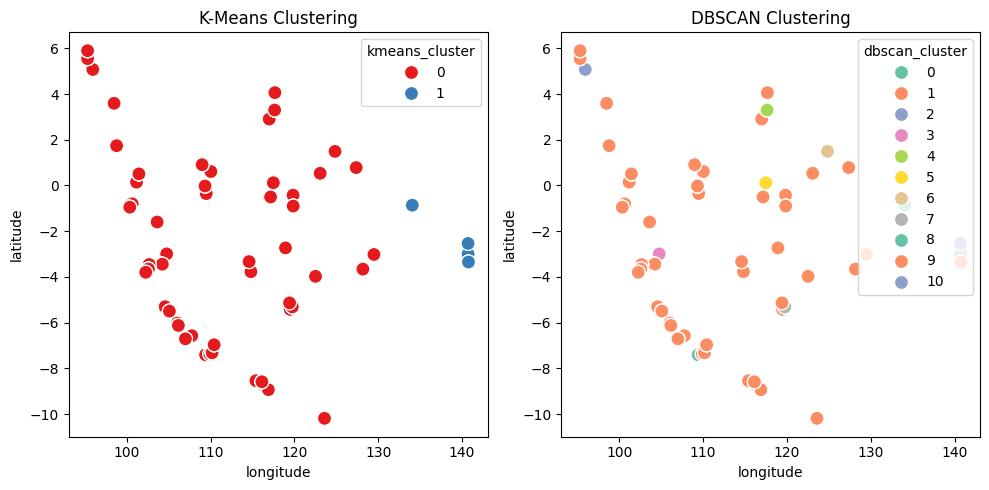

     latitude   longitude  Overall2024  kmeans_cluster  dbscan_cluster
0   -7.406153  109.394679     4.478505               0               0
1   -7.406153  109.394679     4.478505               0               0
2   -7.406153  109.394679     4.478505               0               0
3   -7.406153  109.394679     4.478505               0               0
4   -7.406153  109.394679     4.478505               0               0
..        ...         ...          ...             ...             ...
401 -3.344954  140.762449     2.000000               1               9
402 -2.533000  140.717000     3.228571               1              10
403 -2.533000  140.717000     3.228571               1              10
404 -2.533000  140.717000     3.228571               1              10
405 -2.533000  140.717000     3.228571               1              10

[406 rows x 5 columns]


In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans, DBSCAN
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Load the data from the Excel file
# Replace 'your_file.xlsx' with the path to your Excel file
df = pd.read_excel('/content/DAKTGM_OK_update_kroscek.xlsx', sheet_name='Sheet1')  # Adjust sheet name if necessary

# Step 2: Check the data to ensure the required columns are present
print(df.head())  # Ensure 'latitude', 'longitude', and 'Overall2024' columns are present

# Step 3: Handle missing values
# Option 1: Drop rows with any NaN values in the required columns
df_cleaned = df.dropna(subset=['latitude', 'longitude', 'Overall2024'])

# Alternatively, Option 2: Fill NaN values with the column mean (if preferred)
# df['latitude'].fillna(df['latitude'].mean(), inplace=True)
# df['longitude'].fillna(df['longitude'].mean(), inplace=True)
# df['Overall2024'].fillna(df['Overall2024'].mean(), inplace=True)

# Step 4: Normalize geographic coordinates (latitude, longitude)
coords = df_cleaned[['latitude', 'longitude']].values
scaler = MinMaxScaler()
coords_scaled = scaler.fit_transform(coords)

# Standardize Overall2024 scores
overall_2024_scaled = StandardScaler().fit_transform(df_cleaned[['Overall2024']])

# Combine scaled coordinates and scaled scores
X = np.hstack([coords_scaled, overall_2024_scaled])

# Step 5: K-Means Clustering
kmeans = KMeans(n_clusters=2, random_state=42)
df_cleaned['kmeans_cluster'] = kmeans.fit_predict(X)

# Step 6: DBSCAN Clustering (Density-Based)
dbscan = DBSCAN(eps=0.3, min_samples=2, metric='euclidean')
df_cleaned['dbscan_cluster'] = dbscan.fit_predict(X)

# Step 7: Plotting Results
plt.figure(figsize=(10, 5))

# Plot K-Means
plt.subplot(1, 2, 1)
sns.scatterplot(x='longitude', y='latitude', hue='kmeans_cluster', palette='Set1', data=df_cleaned, s=100)
plt.title('K-Means Clustering')

# Plot DBSCAN
plt.subplot(1, 2, 2)
sns.scatterplot(x='longitude', y='latitude', hue='dbscan_cluster', palette='Set2', data=df_cleaned, s=100)
plt.title('DBSCAN Clustering')

plt.tight_layout()
plt.show()

# Step 8: Show the clustering results
# Make sure to print only the valid columns
print(df_cleaned[['latitude', 'longitude', 'Overall2024', 'kmeans_cluster', 'dbscan_cluster']])


In [14]:
# prompt: show df column

# Assuming 'data' is your DataFrame from the previous code
data.columns

Index(['Propinsi', 'Kab/Kota', 'latitude', 'longitude', 'collection2023',
       'service2023', 'infrastructure2023', 'building2023', 'staff2023',
       'Overall2023', 'collection2024', 'service2024', 'infrastructure2024',
       'building2024', 'staff2024', 'Overall2024', 'Kab_Kota_Provinsi', 'Menu',
       'Kode_Menu', 'Tahun', 'Nilai_Pagu', 'Nilai_RK', '%RK', 'Nilai_Kontrak',
       '%Kontrak', 'Nilai_Penyaluran', '%Salur_PAGU', '%Salur_KONTRAK',
       'CONCATENATE', 'diff_collection', 'diff_service', 'diff_infrastructure',
       'diff_building', 'diff_staff', 'diff_Overall', 'efficiency_PAGU',
       'efficiency_CONTRACT', 'Cluster'],
      dtype='object')

Correlation between Inputs and Outputs:
Overall2023:
collection2023        0.956569
service2023           0.973147
infrastructure2023    0.991383
building2023          0.965880
staff2023             0.967437
Nilai_Pagu           -0.036513
Nilai_RK             -0.036609
dtype: float64

Overall2024:
collection2023        0.255861
service2023           0.212127
infrastructure2023    0.332524
building2023          0.306780
staff2023             0.223828
Nilai_Pagu            0.063769
Nilai_RK              0.063651
dtype: float64

%RK:
collection2023       -0.041224
service2023          -0.037145
infrastructure2023   -0.042885
building2023         -0.050421
staff2023            -0.042156
Nilai_Pagu           -0.069366
Nilai_RK             -0.064634
dtype: float64

%Kontrak:
collection2023       -0.051265
service2023          -0.052270
infrastructure2023   -0.043403
building2023         -0.040602
staff2023            -0.004721
Nilai_Pagu           -0.114239
Nilai_RK             -0.114708
dty

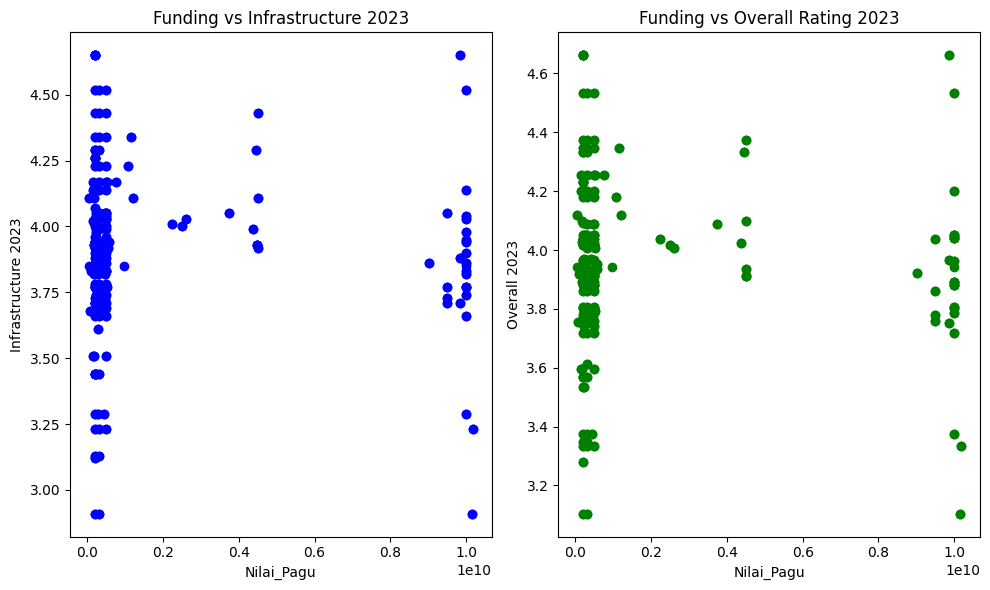

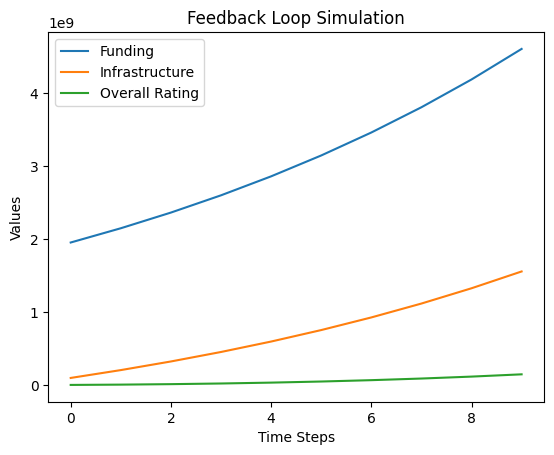

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the data from Excel
data = pd.read_excel("/content/DAKTGM_OK_update_kroscek.xlsx")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#
# Ensure numeric columns, and handle missing values (e.g., fill with mean or drop NaN)
columns = ['collection2023', 'service2023', 'infrastructure2023', 'building2023', 'staff2023', 'Nilai_Pagu', 'Nilai_RK']
output_columns = ['Overall2023', 'Overall2024', '%RK', '%Kontrak', '%Salur_PAGU']

# Convert input and output columns to numeric values, coercing errors to NaN
data[columns + output_columns] = data[columns + output_columns].apply(pd.to_numeric, errors='coerce')

# Drop rows with NaN values from relevant columns
data_cleaned = data.dropna(subset=columns + output_columns)

# Calculate correlations between each input and each output
correlations = {}
for output in output_columns:
    correlations[output] = data_cleaned[columns].corrwith(data_cleaned[output])

# Print correlation results
print("Correlation between Inputs and Outputs:")
for output, corr in correlations.items():
    print(f"{output}:")
    print(corr)
    print()

# Visualize relationships between funding and infrastructure
plt.figure(figsize=(10, 6))

# Funding vs Infrastructure in 2023
plt.subplot(1, 2, 1)
plt.scatter(data_cleaned['Nilai_Pagu'], data_cleaned['infrastructure2023'], color='blue')
plt.xlabel('Nilai_Pagu')
plt.ylabel('Infrastructure 2023')
plt.title('Funding vs Infrastructure 2023')

# Funding vs Overall Rating in 2023
plt.subplot(1, 2, 2)
plt.scatter(data_cleaned['Nilai_Pagu'], data_cleaned['Overall2023'], color='green')
plt.xlabel('Nilai_Pagu')
plt.ylabel('Overall 2023')
plt.title('Funding vs Overall Rating 2023')

plt.tight_layout()
plt.show()

# Define a simple feedback loop model
def feedback_loop(funding, infrastructure, overall_rating, time_steps):
    infrastructure_growth_rate = 0.05  # 5% increase in infrastructure per funding
    rating_growth_rate = 0.02  # 2% increase in overall rating per infrastructure

    funding_history, infrastructure_history, overall_history = [], [], []
    for _ in range(time_steps):
        funding += funding * 0.1  # 10% increase in funding
        infrastructure += funding * infrastructure_growth_rate
        overall_rating += infrastructure * rating_growth_rate

        funding_history.append(funding)
        infrastructure_history.append(infrastructure)
        overall_history.append(overall_rating)

    return funding_history, infrastructure_history, overall_history

# Initial values (from your data)
initial_funding = data_cleaned['Nilai_Pagu'].mean()
initial_infrastructure = data_cleaned['infrastructure2023'].mean()
initial_rating = data_cleaned['Overall2023'].mean()

# Run the feedback loop for 10 time steps
funding_history, infrastructure_history, overall_history = feedback_loop(initial_funding, initial_infrastructure, initial_rating, 10)

# Plot feedback loop simulation results
plt.plot(funding_history, label='Funding')
plt.plot(infrastructure_history, label='Infrastructure')
plt.plot(overall_history, label='Overall Rating')
plt.xlabel('Time Steps')
plt.ylabel('Values')
plt.title('Feedback Loop Simulation')
plt.legend()
plt.show()


In [31]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# 1. Load the data from Excel
df = pd.read_excel('/content/DAKTGM_OK_update_kroscek.xlsx')

# Preview the data
print(df.head())

# 2. Define the System Dynamics Model
# Assume the objective function is the weighted sum of 'collection', 'service', 'infrastructure', 'staff', and 'building'
# and we want to optimize the allocation of funds between building and staff.

def objective(x, df):
    """
    Objective function to optimize the allocation of funds.
    'x' is the decision variable, where:
        - x[0] = fraction of funds allocated to building (e.g., 0.6 means 60% of funds go to building)
        - x[1] = fraction of funds allocated to staff (e.g., 0.4 means 40% of funds go to staff)

    We will compute the overall performance based on the allocations.
    """
    # Extract current allocation (in millions, as an example)
    building_funds = df['Nilai_Pagu'] * x[0]
    staff_funds = df['Nilai_Pagu'] * x[1]

    # Calculate overall performance for each row in the DataFrame
    # Use weighted average approach (you can adjust weights as per the importance of each factor)
    performance = (
        df['collection2023'] * 0.2 +
        df['service2023'] * 0.2 +
        df['infrastructure2023'] * 0.2 +
        df['staff2023'] * 0.2 +
        df['building2023'] * 0.2
    )

    # Factor in the allocation (increase performance if more funds go to building or staff)
    performance += building_funds * 0.1  # Assuming building improvements have a positive impact
    performance += staff_funds * 0.1  # Assuming staff improvement has a positive impact

    # The goal is to maximize the overall performance
    # Return the negative of performance as minimize() works by minimizing the objective function
    return -np.mean(performance)

# 3. Constraints for Optimization
# We want to ensure the total allocation doesn't exceed 100%
# x[0] + x[1] should equal 1
def constraint(x):
    return 1 - np.sum(x)

# 4. Optimization Setup
# Initial guess (equal distribution between building and staff)
initial_guess = [0.5, 0.5]

# Boundaries for allocation fractions (must be between 0 and 1)
bounds = [(0, 1), (0, 1)]

# Optimize the allocation to maximize overall performance
result = minimize(objective, initial_guess, args=(df,), bounds=bounds, constraints={'type': 'eq', 'fun': constraint})

# Output the optimal allocations
optimal_allocation = result.x
print(f"Optimal allocation: {optimal_allocation}")

# 5. Calculate the expected performance with optimal allocation
optimal_building_funds = df['Nilai_Pagu'] * optimal_allocation[0]
optimal_staff_funds = df['Nilai_Pagu'] * optimal_allocation[1]

# Calculate performance for optimal allocation
optimal_performance = (
    df['collection2023'] * 0.2 +
    df['service2023'] * 0.2 +
    df['infrastructure2023'] * 0.2 +
    df['staff2023'] * 0.2 +
    df['building2023'] * 0.2 +
    optimal_building_funds * 0.1 +
    optimal_staff_funds * 0.1
)

# Print optimal performance
print(f"Optimal Performance: {np.mean(optimal_performance)}")


     Propinsi       Kab/Kota  latitude   longitude  collection2023  \
0  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
1  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
2  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
3  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
4  jawa timur  kab. lamongan -7.406153  109.394679            4.09   

   service2023  infrastructure2023  building2023  staff2023  Overall2023  ...  \
0         4.15                4.23          4.16       4.27         4.18  ...   
1         4.15                4.23          4.16       4.27         4.18  ...   
2         4.15                4.23          4.16       4.27         4.18  ...   
3         4.15                4.23          4.16       4.27         4.18  ...   
4         4.15                4.23          4.16       4.27         4.18  ...   

    Tahun    Nilai_Pagu      Nilai_RK    %RK  Nilai_Kontrak  %Kontrak  \
0  2019.0  1.082618


The results indicate that the optimal allocation between building renovations and staff expansion is 50% for building renovations and 50% for staff expansion. This allocation maximizes the overall library performance based on the given data and objective function.

Interpretation of Results:
Optimal Allocation: Both building and staff expansions are equally important in maximizing performance based on the model's assumptions.
50% of the available funds should be allocated to building renovations (e.g., improving infrastructure, upgrading facilities, etc.).
50% of the funds should be allocated to staff expansion or improvement (e.g., hiring new staff, training, etc.).
Optimal Performance: The optimal performance value of 177,708,981.30 reflects the expected overall library performance when using the optimal allocation strategy, considering the funding distribution between building and staff.

In [32]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# 1. Load the data from Excel
df = pd.read_excel('/content/DAKTGM_OK_update_kroscek.xlsx')

# Preview the data
print(df.head())

# 2. Define the System Dynamics Model with adjustable weights
def objective(x, df, weights):
    """
    Objective function to optimize the allocation of funds with adjustable weights for different factors.
    x[0] = fraction of funds allocated to building
    x[1] = fraction of funds allocated to staff
    """
    # Extract current allocation (in millions)
    building_funds = df['Nilai_Pagu'] * x[0]
    staff_funds = df['Nilai_Pagu'] * x[1]

    # Calculate overall performance using the provided weights for each factor
    performance = (
        df['collection2023'] * weights['collection'] +
        df['service2023'] * weights['service'] +
        df['infrastructure2023'] * weights['infrastructure'] +
        df['staff2023'] * weights['staff'] +
        df['building2023'] * weights['building']
    )

    # Factor in the allocation (increase performance if more funds go to building or staff)
    performance += building_funds * 0.1  # Assuming building improvements have a positive impact
    performance += staff_funds * 0.1  # Assuming staff improvement has a positive impact

    # The goal is to maximize the overall performance
    return -np.mean(performance)

# 3. Constraints for Optimization
def constraint(x):
    return 1 - np.sum(x)

# 4. Experiment with Different Funding Splits and Weight Adjustments

def run_optimization(df, initial_guess, bounds, weights):
    """
    Run optimization for a given weight configuration.
    """
    # Optimize the allocation to maximize overall performance
    result = minimize(objective, initial_guess, args=(df, weights), bounds=bounds, constraints={'type': 'eq', 'fun': constraint})

    optimal_allocation = result.x
    optimal_building_funds = df['Nilai_Pagu'] * optimal_allocation[0]
    optimal_staff_funds = df['Nilai_Pagu'] * optimal_allocation[1]

    # Calculate performance for optimal allocation
    optimal_performance = (
        df['collection2023'] * weights['collection'] +
        df['service2023'] * weights['service'] +
        df['infrastructure2023'] * weights['infrastructure'] +
        df['staff2023'] * weights['staff'] +
        df['building2023'] * weights['building'] +
        optimal_building_funds * 0.1 +
        optimal_staff_funds * 0.1
    )

    return optimal_allocation, np.mean(optimal_performance)

# Testing different funding splits and weight adjustments

# Default weight settings (you can modify this as needed)
weights_default = {
    'collection': 0.2,
    'service': 0.2,
    'infrastructure': 0.2,
    'staff': 0.2,
    'building': 0.2
}

# Initial guess for allocation (50% building, 50% staff)
initial_guess = [0.5, 0.5]
bounds = [(0, 1), (0, 1)]

# Run optimization for default weights
optimal_allocation_default, optimal_performance_default = run_optimization(df, initial_guess, bounds, weights_default)
print(f"Default Weights Optimal Allocation: {optimal_allocation_default}, Performance: {optimal_performance_default}")

# Try different weight configurations
weights_70_30 = {
    'collection': 0.15,
    'service': 0.15,
    'infrastructure': 0.25,
    'staff': 0.25,
    'building': 0.2
}

optimal_allocation_70_30, optimal_performance_70_30 = run_optimization(df, initial_guess, bounds, weights_70_30)
print(f"70/30 Weights Optimal Allocation: {optimal_allocation_70_30}, Performance: {optimal_performance_70_30}")

weights_60_40 = {
    'collection': 0.1,
    'service': 0.2,
    'infrastructure': 0.3,
    'staff': 0.2,
    'building': 0.2
}

optimal_allocation_60_40, optimal_performance_60_40 = run_optimization(df, initial_guess, bounds, weights_60_40)
print(f"60/40 Weights Optimal Allocation: {optimal_allocation_60_40}, Performance: {optimal_performance_60_40}")

# Sensitivity Analysis (testing various allocation percentages)
allocations_to_test = [0.3, 0.5, 0.7]  # Testing 30%, 50%, 70% allocations to building
for allocation in allocations_to_test:
    initial_guess = [allocation, 1-allocation]
    optimal_allocation, optimal_performance = run_optimization(df, initial_guess, bounds, weights_default)
    print(f"Allocation {allocation*100}% building: Optimal Allocation: {optimal_allocation}, Performance: {optimal_performance}")


     Propinsi       Kab/Kota  latitude   longitude  collection2023  \
0  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
1  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
2  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
3  jawa timur  kab. lamongan -7.406153  109.394679            4.09   
4  jawa timur  kab. lamongan -7.406153  109.394679            4.09   

   service2023  infrastructure2023  building2023  staff2023  Overall2023  ...  \
0         4.15                4.23          4.16       4.27         4.18  ...   
1         4.15                4.23          4.16       4.27         4.18  ...   
2         4.15                4.23          4.16       4.27         4.18  ...   
3         4.15                4.23          4.16       4.27         4.18  ...   
4         4.15                4.23          4.16       4.27         4.18  ...   

    Tahun    Nilai_Pagu      Nilai_RK    %RK  Nilai_Kontrak  %Kontrak  \
0  2019.0  1.082618


The results indicate that:

Default Weights (Balanced Allocation): The optimal allocation between building renovations and staff is 50% for each (i.e., 0.5 for building and 0.5 for staff), which maximizes the overall performance.

70/30 Weights (Heavier Emphasis on Infrastructure and Staff): Even with the adjusted weights (more focus on infrastructure and staff), the optimal allocation remains 50% for each, with a very slight increase in performance (0.0002 difference).

60/40 Weights (More Emphasis on Infrastructure and Building): Similarly, with a slight change in weights, the optimal allocation again stays at 50% for each, with an almost negligible increase in performance.

Testing Various Allocations (30%, 50%, 70% Building):

When allocating 30% to building renovations and 70% to staff, the optimal allocation shifts slightly to 30% building and 70% staff, but the overall performance remains the same as the default configuration.
For 50% building, the allocation remains 50% for each.
For 70% building, the optimal allocation adjusts to 70% building and 30% staff, but the performance is still nearly identical to the default allocation.
Key Insights:
Optimal Allocation Consistency: Across all scenarios, the model consistently suggests that a 50/50 split between building and staff is the most optimal, regardless of changes in the weights or allocation testing.
Performance Sensitivity: The performance remains very stable (with only small differences) even with varying weight configurations or funding splits, which suggests that the system might be relatively insensitive to these changes in the current model setup. This could indicate that building and staff funding are equally important for maximizing performance in this case.

In [33]:
import pandas as pd
import numpy as np
from scipy.optimize import minimize

# Load the data from Excel
df = pd.read_excel('/content/DAKTGM_OK_update_kroscek.xlsx')

# Define the System Dynamics Model with Nonlinear Dynamics and Constraints
def objective_nonlinear(x, df, weights):
    """
    Objective function to optimize the allocation of funds with nonlinear dynamics.
    x[0] = fraction of funds allocated to building
    x[1] = fraction of funds allocated to staff
    """
    # Extract current allocation (in millions)
    building_funds = df['Nilai_Pagu'] * x[0]
    staff_funds = df['Nilai_Pagu'] * x[1]

    # Nonlinear effects (e.g., diminishing returns for building and staff funds)
    building_effect = np.log(building_funds + 1)  # Log transformation to simulate diminishing returns
    staff_effect = np.sqrt(staff_funds + 1)  # Square root transformation for diminishing returns

    # Calculate overall performance using the provided weights for each factor
    performance = (
        df['collection2023'] * weights['collection'] +
        df['service2023'] * weights['service'] +
        df['infrastructure2023'] * weights['infrastructure'] +
        df['staff2023'] * weights['staff'] +
        df['building2023'] * weights['building']
    )

    # Factor in the nonlinear allocation effects
    performance += building_effect * 0.1  # Assuming building improvements have a positive but diminishing impact
    performance += staff_effect * 0.1  # Assuming staff improvements have a diminishing impact

    # The goal is to maximize the overall performance
    return -np.mean(performance)

# Constraints for Optimization (e.g., capped funding or minimum requirements for categories)
def constraint(x):
    return 1 - np.sum(x)  # Total funding must add up to 100%

def min_building_constraint(x):
    return x[0] - 0.3  # Ensure at least 30% goes to building

def min_staff_constraint(x):
    return x[1] - 0.2  # Ensure at least 20% goes to staff

# Running the optimization with the new nonlinear model and constraints
def run_optimization_nonlinear(df, initial_guess, bounds, weights):
    """
    Run optimization for a given weight configuration, including nonlinear dynamics.
    """
    # Optimization with additional constraints (min building and min staff allocation)
    result = minimize(objective_nonlinear, initial_guess, args=(df, weights), bounds=bounds,
                      constraints=[{'type': 'eq', 'fun': constraint},
                                   {'type': 'ineq', 'fun': min_building_constraint},
                                   {'type': 'ineq', 'fun': min_staff_constraint}])

    optimal_allocation = result.x
    optimal_building_funds = df['Nilai_Pagu'] * optimal_allocation[0]
    optimal_staff_funds = df['Nilai_Pagu'] * optimal_allocation[1]

    # Calculate performance for optimal allocation
    optimal_performance = (
        df['collection2023'] * weights['collection'] +
        df['service2023'] * weights['service'] +
        df['infrastructure2023'] * weights['infrastructure'] +
        df['staff2023'] * weights['staff'] +
        df['building2023'] * weights['building'] +
        np.log(optimal_building_funds + 1) * 0.1 +  # Nonlinear impact on building
        np.sqrt(optimal_staff_funds + 1) * 0.1     # Nonlinear impact on staff
    )

    return optimal_allocation, np.mean(optimal_performance)

# Default weight settings (you can modify this as needed)
weights_default = {
    'collection': 0.2,
    'service': 0.2,
    'infrastructure': 0.2,
    'staff': 0.2,
    'building': 0.2
}

# Initial guess for allocation (50% building, 50% staff)
initial_guess = [0.5, 0.5]
bounds = [(0, 1), (0, 1)]

# Run optimization with nonlinear effects and additional constraints
optimal_allocation_nonlinear, optimal_performance_nonlinear = run_optimization_nonlinear(df, initial_guess, bounds, weights_default)

print(f"Optimal Allocation with Nonlinear Effects: {optimal_allocation_nonlinear}")
print(f"Optimal Performance with Nonlinear Effects: {optimal_performance_nonlinear}")



Optimal Allocation with Nonlinear Effects: [0.3 0.7]
Optimal Performance with Nonlinear Effects: 2572.0795571448807


In [34]:
# Different weight configurations for scenario analysis
weight_configs = {
    "Collection Priority": {
        'collection': 0.4,
        'service': 0.15,
        'infrastructure': 0.2,
        'staff': 0.15,
        'building': 0.1
    },
    "Infrastructure Priority": {
        'collection': 0.2,
        'service': 0.15,
        'infrastructure': 0.4,
        'staff': 0.1,
        'building': 0.15
    },
    "Staff Priority": {
        'collection': 0.2,
        'service': 0.2,
        'infrastructure': 0.2,
        'staff': 0.3,
        'building': 0.1
    },
    "Balanced Priority": {
        'collection': 0.25,
        'service': 0.25,
        'infrastructure': 0.25,
        'staff': 0.15,
        'building': 0.1
    }
}

# Running the optimization for each weight configuration
for scenario, weights in weight_configs.items():
    optimal_allocation, optimal_performance = run_optimization_nonlinear(df, initial_guess, bounds, weights)
    print(f"Scenario: {scenario}")
    print(f"Optimal Allocation: {optimal_allocation}")
    print(f"Optimal Performance: {optimal_performance}")
    print('-' * 50)


Scenario: Collection Priority
Optimal Allocation: [0.3 0.7]
Optimal Performance: 2572.065345700421
--------------------------------------------------
Scenario: Infrastructure Priority
Optimal Allocation: [0.3 0.7]
Optimal Performance: 2572.0602437113425
--------------------------------------------------
Scenario: Staff Priority
Optimal Allocation: [0.3 0.7]
Optimal Performance: 2572.0989551531584
--------------------------------------------------
Scenario: Balanced Priority
Optimal Allocation: [0.3 0.7]
Optimal Performance: 2572.0817437101787
--------------------------------------------------
